In [ ]:
# 520102 Abhishek Bogoju
# 520208 Nikhil Naidu
# 520211 P. Dhanush Narasimha
# 520232 Sai Sripad Vemula
# 520246 Varanasi Sai Krishna

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\saisr\Notes\3-2\Machine Learning\T1 (1).csv")
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [4]:
df.shape

(50530, 5)

In [5]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
df2 = df.drop('Date/Time',axis = 1)

In [7]:
df2.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645905,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286


[]

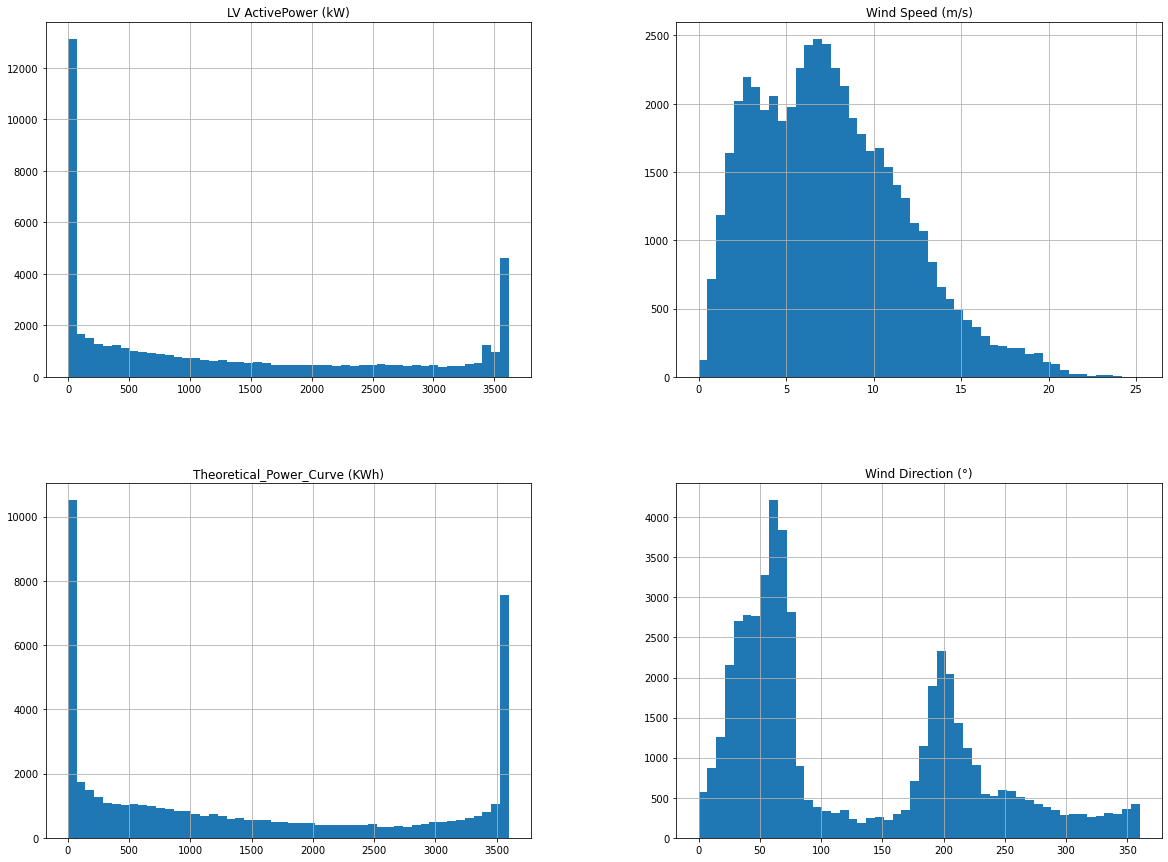

In [8]:
df2.hist(bins=50,figsize=(20,15))
plt.plot()

In [9]:
y= df2['Theoretical_Power_Curve (KWh)']
X= df2.drop('Theoretical_Power_Curve (KWh)',axis=1)

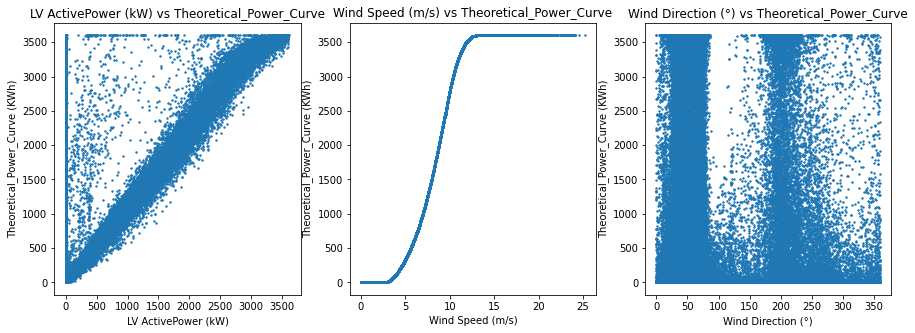

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(X.columns):
    axs[i].scatter(X[feature], y, s=2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Theoretical_Power_Curve (KWh)')
    axs[i].set_title(f'{feature} vs Theoretical_Power_Curve')

plt.show()

In [11]:
X.shape, y.shape

((50530, 3), (50530,))

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_tv, y_train, y_tv = train_test_split(X,y,test_size = 0.2, random_state = 7)
x_val, x_test, y_val, y_test = train_test_split(x_tv,y_tv,test_size = 0.5, random_state = 7)

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lin_reg.predict(x_train)
np.sqrt((mean_squared_error(y_train,y_pred)))

338.1072856397385

In [15]:
r2_score(y_train,y_pred)

0.9388798144441814

In [16]:
y_pred = lin_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

334.71974240540305

In [17]:
r2_score(y_test,y_pred)

0.9398025016211947

In [18]:
t = np.array([[3604.287109,13.19340992,223.3361969]])
lin_reg.predict(t)

c:\users\saisr\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3550.80056456])

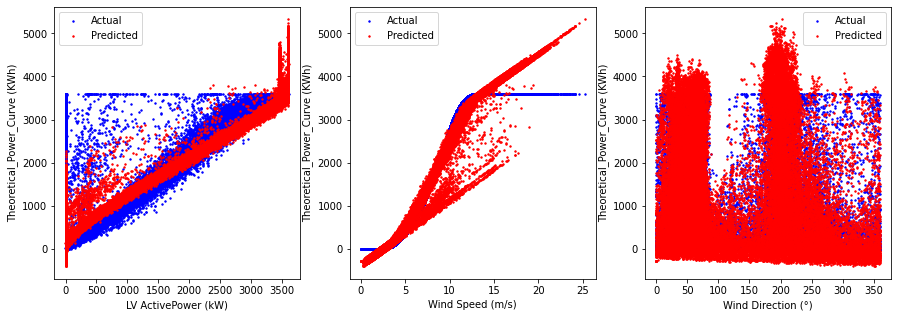

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

for i, feature in enumerate(X.columns):
    axs[i].scatter(X[feature], y, color='blue', s=2, label='Actual')
    axs[i].scatter(X[feature], lin_reg.predict(X), color='red', s=2, label='Predicted')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Theoretical_Power_Curve (KWh)')
    axs[i].legend()

plt.show()

In [20]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [21]:
y_pred = xgb_reg.predict(x_val)
np.sqrt(mean_squared_error(y_val,y_pred))

1.4223406109465053

In [22]:
r2_score(y_val,y_pred)

0.999998929514573

In [23]:
y_pred = xgb_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.4444798295282038

In [24]:
r2_score(y_test,y_pred)

0.9999988789144624